In [2]:
import pickle
from ripe.atlas.sagan import TracerouteResult
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random

In [21]:
G = nx.Graph()

city_dic = {"Norden": 1, "Bremen": 2, "Hamburg": 3, "Hannover": 4, "Berlin": 5, "Leipzig": 6, "Nurnberg": 7, "Munich": 8, "Ulm": 9, "Stuttgart": 10, "Karlsruhe": 11, "Mannheim": 12, "Frankfurt": 13, "Koln": 14, "Dusseldorf": 15, "Essen": 16, "Dortmund": 17}
city_dic["Norden"]

1

In [ ]:
G_num = nx.Graph()
G_name = nx.Graph()

distance_factor = 2

for i in city_dic:
    val = city_dic[i]
    G_num.add_node(val)
    G_name.add_node(i)
    # for j in range(1, 18):
    #     if i != j:
    #         G.add_edge(i,j)
G_num.remove_node(12)
G_name.remove_node("Mannheim") # Remove Mannheim node

# Original links from the website
links = [("Munich", "Ulm"), ("Munich", "Nurnberg"), ("Ulm", "Stuttgart"), ("Stuttgart", "Nurnberg"), 
         ("Stuttgart", "Karlsruhe"), ("Karlsruhe", "Mannheim"), ("Mannheim", "Frankfurt"), 
         ("Frankfurt", "Nurnberg"), ("Nurnberg", "Leipzig"), ("Frankfurt", "Leipzig"), ("Frankfurt", "Hannover"),
         ("Frankfurt", "Koln"), ("Koln", "Dusseldorf"), ("Koln", "Dortmund"), ("Dusseldorf", "Essen"),
         ("Essen", "Dortmund"), ("Dortmund", "Hannover"), ("Dortmund", "Norden"), ("Norden", "Bremen"),
         ("Bremen", "Hannover"), ("Bremen", "Hamburg"), ("Hamburg", "Berlin"), ("Berlin", "Leipzig"), ("Berlin", "Hannover"),
         ("Leipzig", "Hannover"), ("Hamburg", "Hannover")]

# Add links from Karlsruhe to Frankfurt to mitigate the absence of Mannheim

links.append(("Karlsruhe", "Frankfurt"))

names = list(G_name.nodes)
# for i_name, name in enumerate(names):
#     names[i_name] = name.lower()

for i_link in links:
    src = i_link[0]
    dst = i_link[1]

    # src = i_link[0].lower()
    # dst = i_link[1].lower()

    if src in names and dst in names:
        G_name.add_edge(src, dst,length=1, capacity=1)
        G_num.add_edge(city_dic[src], city_dic[dst],length=1, capacity=1)
    else:
        print("Not found:", i_link)
    # print("i_link:", i_link)
    # print("Src:", src, "Dst:", dst)

edge_lengths = nx.get_edge_attributes(G_name, "length")
edge_capacities = nx.get_edge_attributes(G_name, "capacity")
edge_labels = {}

for i, key in enumerate(edge_lengths):
    # print("Key:", key)
    
    length = edge_lengths[key]
    capacity = edge_capacities[key]

    edge_labels[key] = "l: " + str(length) + ", c: " + str(capacity)
# print("Edge lens:", edge_lengths)

Not found: ('Karlsruhe', 'Mannheim')
Not found: ('Mannheim', 'Frankfurt')


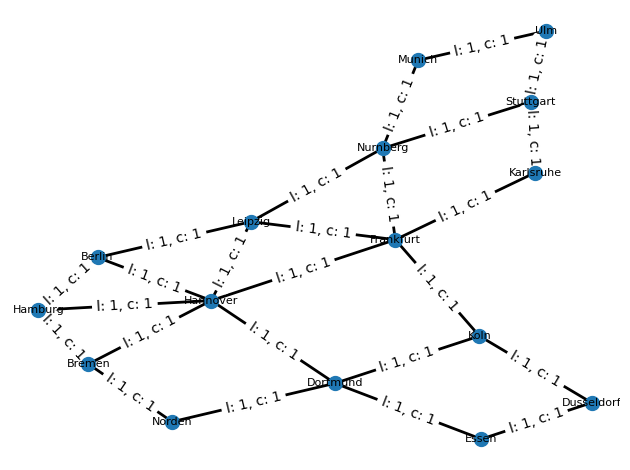

In [99]:
# DRAWING (G_name)
pos = nx.spring_layout(G_name, seed=10)

# nodes
nx.draw_networkx_nodes(G_name, pos, node_size=100)

# edges
nx.draw_networkx_edges(G_name, pos, edgelist=G_name.edges, width=2)

# node labels
nx.draw_networkx_labels(G_name, pos, font_size=8, font_family="sans-serif")

# edge labels
edge_lengths = nx.get_edge_attributes(G_name, "length")
edge_capacities = nx.get_edge_attributes(G_name, "capacity")
nx.draw_networkx_edge_labels(G_name, pos, edge_labels)

ax = plt.gca()
ax.margins(0.00115)
plt.axis("off")
plt.tight_layout()
plt.show()

# nx.draw(G_name, with_labels=True ,font_weight='bold')
# nx.draw_networkx_edge_labels(G_name, edge_labels=edge_lengths)
# # nx.draw(G_num, with_labels=True, font_weight='bold')

In [57]:
print("#Edges:", G_name.number_of_edges(), "#Nodes:", G_name.number_of_nodes())

#Edges: 25 #Nodes: 16
